### 목표
- 승객들의 데이터를 활용하여 사망/생존을 예측해보자
- kaggle사이트에 예측값 업로드하여 정확도를 확인, 높은 순위를 차지해보자
- 머신러닝 전체 과정을 이해하면서 전처리 부분을 더 깊게 진행해보자

#### 머신러닝 과정
- 문제 정의
- 데이터 수집
- 데이터 전처리
- 탐색적 데이터 분석
- 모델 선택 및 하이퍼 파라미터
- 모델 학습
- 모델 예측, 평가
- 모델 가지고 앱, 웹상에서 서비스화

### 데이터 수집(불러오기)

train : 훈련용 문제, 답  
test : 테스트용 문제  
gender_submission : 예측한 값을 캐글에 올릴 수 있는 답안지   

In [1]:
# 도구 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
# train, test 
# 인덱스 설정: 특정 컬럼을 인덱스 설정해서 불러오기
train = pd.read_csv('data/titanic_data/train.csv', index_col = 'PassengerId')
test = pd.read_csv('data/titanic_data/test.csv', index_col = 'PassengerId')

In [4]:
# 데이터 확인 
# 위에서부터 5개의 행 출력해보기
train.head()
# Survived 훈련용 답 : 0- 사망, 1-생존

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head() 
# 테스트 답 x : kaggle 에 답이 있기때문에 예측값 kaggle에 올려서 비교해봐야함
# test 데이터는 테스트하기위한 문제

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print('훈련데이터 크기:', train.shape) # 지도 - 분류 (훈련용답포함)
print('테스트데이터 크기:', test.shape)

훈련데이터 크기: (891, 11)
테스트데이터 크기: (418, 10)


### 데이터 전처리 및 데이터 탐색

In [7]:
# train 정보 확인
train.info()
# 결측치 존재 : age, cabin, embarked

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
# test 정보 확인
test.info()
# 결측치 존재 : age, fare, cabin

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


train - Embarked 채우기

In [10]:
# embarked 확인할 수 있는 데이터 빈도수 살펴보기
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
# train['Embarked'] 결측치는 'S'라는 값으로 다 채워보자
train['Embarked'] = train['Embarked'].fillna('S')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


test-Fare 결측치 채워보기

In [14]:
# test의 어떤 행에 결측치가 있을까 ?
# isnull() 결측치가 있으면 True, 없다면 False
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [15]:
# 상관관계
# 상관계수: -1~1 -> -1,1에 가까울수록 상관관계 높다, 0에 가까울수록 상관관계가 낮다
# corr
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
# 상관이 있는 컬럼은 Pclass(등급1,2,3)
# 생존과 연관이 있을 것 같은 Sex 컬럼도 연결시켜 요금의 평균 확인해 볼 예정

In [20]:
gb1 = train[['Pclass','Sex','Fare']].groupby(['Pclass','Sex']).mean()
gb1

Fare
Pclass Sex               
1      female  106.125798
       male     67.226127
2      female   21.970121
       male     19.741782
3      female   16.118810
       male     12.661633

In [33]:
# 3등급, male
f = gb1.loc[(3,'male'),'Fare']
f

12.661632564841513

In [35]:
# test 요금 컬럼 빈값 채우기
test['Fare'] = test['Fare'].fillna(f)

In [38]:
# 결측치 처리가 되었는지 확인
test[test['Fare'].isnull()]
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


train,test - Age 결측치 채우기

In [40]:
# 어떤 나이 데이터의 결측치가 존재하는지 확인
train[train['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [42]:
# 어떤 컬럼과 연관해서 결측치를 채워야 할까?
# 상관관계를 통해서 연관있는 컬럼을 찾아보자
# -1,1 상관관계 높음, 0 가까울수록 상관관계가 낮음
train.corr()

# age컬럼은 pclass컬럼과 관계가 있음.. ! 
# 생존,사망과 연관이 있을 것 같은 성별데이터도 활용하여 결측치 채워보자

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [44]:
# pclass와 sex 컬럼을 그룹핑하여 나이의 평균 출력
gb2 = train[['Pclass','Sex','Age']].groupby(['Pclass','Sex']).mean()

In [45]:
# 결측치 처리하는 함수 정의
# apply 함수 이용
def fill_age(row):
    # row나이의 결측치가 있으면 
    if np.isnan(row['Age']):
        return gb2.loc[(row['Pclass'],row['Sex'])]
    # row나이의 결측치가 없다면
    else: 
        return row['Age']

In [47]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [49]:
# train 적용
train['Age'] = train.apply(fill_age, axis = 1).astype('int64')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [50]:
# test 적용
# axis = 1 열방향(함수안의 row 각사람들의 데이터 )
test['Age'] = test.apply(fill_age, axis = 1).astype('int64')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


train,test - cabin 결측치 채우기

In [51]:
# 객실 데이터 
# 중복없이 값 확인하기.unique()
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [53]:
# 임의의 데이터로 채워줘 보자
# 'M'
train['Deck'] = train['Cabin'].fillna('M')
test['Deck'] = test['Cabin'].fillna('M')
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 90.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non

In [58]:
# 객실층에 대한 정보만 Deck 컬럼에 저장
train['Deck'] = train['Deck'].str[0]
test['Deck'] = test['Deck'].str[0]

In [59]:
train['Deck'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [60]:
# Cabin 삭제 
# drop
train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


#### 데이터 탐색
- train데이터 기준으로 탐색함
- test를 탐색하는 것은 모델의 일반화에 도움이 되지 않기 때문

범주형 데이터 탐색

In [62]:
# Deck 컬럼 시각화
# M 이라것이 중요할지 안할지,,,,,,? 파악해볼 필요가 있음

In [64]:
train[['Deck','Survived','Name']].groupby(['Deck','Survived']).count()

Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

<AxesSubplot:xlabel='Deck', ylabel='count'>

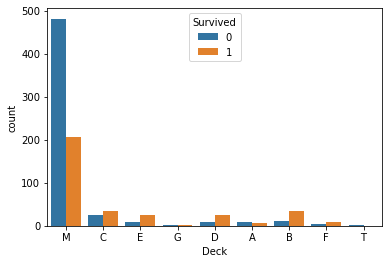

In [65]:
sns.countplot(data = train, x = 'Deck', hue = 'Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

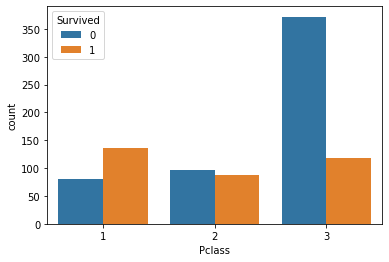

In [66]:
# Pclass 시각화
sns.countplot(data =train, x = 'Pclass', hue = 'Survived')

<AxesSubplot:xlabel='Deck', ylabel='count'>

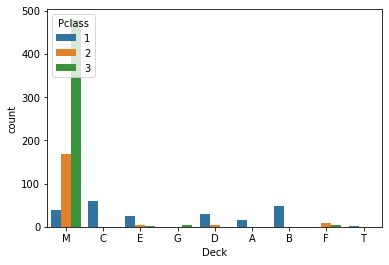

In [67]:
# Deck 컬럼과 Pclass  시각화
sns.countplot(data = train, x = 'Deck',hue = 'Pclass')

In [68]:
# 'M' 생존 비율도 어느정도 있지만, 사망율 높다 -> 
# Pclass 랑 연관지어 보니 M쪽에 속한 사람들은 3등급의 사람들이 많더라
# 사망율이 높게 표현된 것

<AxesSubplot:xlabel='Sex', ylabel='count'>

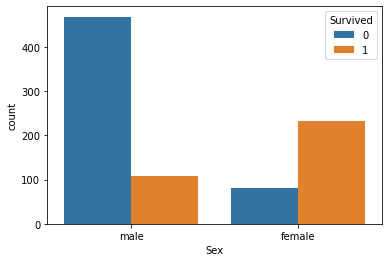

In [69]:
# Sex 시각화
sns.countplot(data = train, x = 'Sex', hue = 'Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

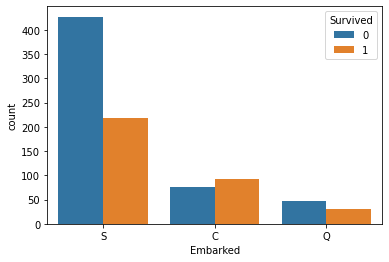

In [70]:
# Embarked 시각화
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')

수치형 데이터

(0.0, 80.0)

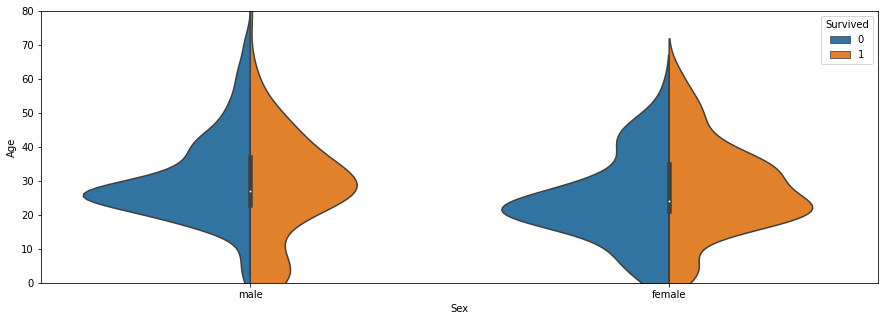

In [72]:
# Age 시각화
plt.figure(figsize = (15,5))
sns.violinplot(data = train,
              x = 'Sex',
              y = 'Age',
              hue = 'Survived',
              split = True)
plt.ylim(0,80)

In [73]:
# 20~40대 사이에서는 사망율이 상대적으로 높음
# 어린아이 중에서는 남자아이가 여자아이에 비해 생존율이 높음

(0.0, 300.0)

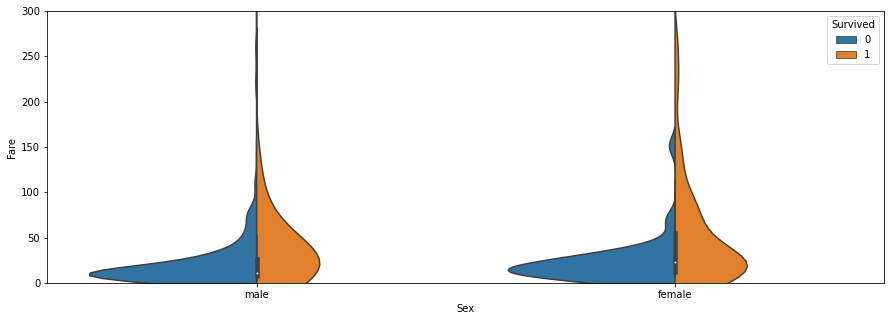

In [75]:
# Fare 시각화
plt.figure(figsize=(15,5))
sns.violinplot(data = train,
              x = 'Sex',
              y = 'Fare',
              hue = 'Survived',
              split = True)
plt.ylim(0,300)

In [ ]:
# 요금이 싼 사람은 상대적으로 사망율이 높음

특성공학 - 새로운 컬럼 생성: 가족의 수 


In [76]:
# Parch + SibSp + 1(나 자신)
train['Family_Size'] = train['Parch'] +train['SibSp'] + 1
train['Family_Size']

PassengerId
1      2
2      2
3      1
4      2
5      1
      ..
887    1
888    1
889    4
890    1
891    1
Name: Family_Size, Length: 891, dtype: int64

In [77]:
test['Family_Size'] = test['Parch'] +test['SibSp'] +1
test['Family_Size']

PassengerId
892     1
893     2
894     1
895     1
896     3
       ..
1305    1
1306    1
1307    1
1308    1
1309    3
Name: Family_Size, Length: 418, dtype: int64

<AxesSubplot:xlabel='Family_Size', ylabel='count'>

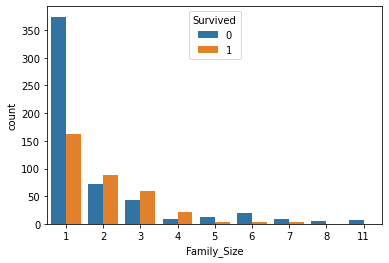

In [79]:
# 가족수에 따라 생존, 사망 시각화
sns.countplot(data = train, x = 'Family_Size', hue = 'Survived')

In [80]:
# 범위를 줄여서 데이터 확인했을때, 사소한 관찰의 오류를 줄일 수 있음

In [81]:
# 1 => 사망의 비율이 높음 (Alone)
# 2~4 => 생존의 비율 높음 (Small)
# 5~11 => 사망의 비율이 높음 (Large)
# cut -> 카테고리화 함수 (구간화 시켜주는 함수)
bins = [0,1,4,11]
labels = ['Alone','Small','Large']
train['Family_Group'] = pd.cut(train['Family_Size'],bins = bins, labels = labels)
test['Family_Group'] = pd.cut(test['Family_Size'],bins = bins, labels = labels)

<AxesSubplot:xlabel='Family_Group', ylabel='count'>

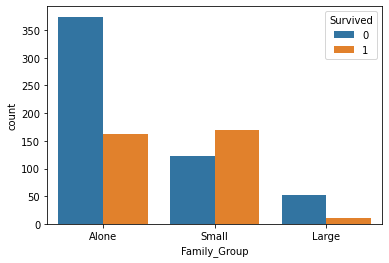

In [82]:
sns.countplot(data = train, x = 'Family_Group', hue = 'Survived')

In [83]:
# Family_Size 컬럼은 삭제
train.drop('Family_Size', axis = 1, inplace = True)
test.drop('Family_Size', axis = 1, inplace = True)

In [85]:
# Name, Ticket 삭제
train.drop(['Name','Ticket'], axis = 1, inplace = True)
test.drop(['Name','Ticket'], axis = 1, inplace = True)

In [86]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int64   
 4   SibSp         891 non-null    int64   
 5   Parch         891 non-null    int64   
 6   Fare          891 non-null    float64 
 7   Embarked      891 non-null    object  
 8   Deck          891 non-null    object  
 9   Family_Group  891 non-null    category
dtypes: category(1), float64(1), int64(5), object(3)
memory usage: 110.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Sex           418 non-null    object  
 2   Ag

문제와 답으로 분리

In [87]:
X_train = train.iloc[:,1:]# 훈련용 문제
y_train = train['Survived']# 훈련용 답
X_test = test# 테스트용 문제

In [93]:
# 문제 데이터에 대해서 인코딩 
X_train_one_hot = pd.get_dummies(X_train)

In [95]:
X_test_one_hot = pd.get_dummies(X_test)

In [96]:
X_test_one_hot

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_M,Family_Group_Alone,Family_Group_Small,Family_Group_Large
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34,0,0,7.8292,0,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
893,3,47,1,0,7.0000,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
894,2,62,0,0,9.6875,0,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
895,3,27,0,0,8.6625,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
896,3,22,1,1,12.2875,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,26,0,0,8.0500,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
1306,1,39,0,0,108.9000,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1307,3,38,0,0,7.2500,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0


In [97]:
print(X_train_one_hot.shape)
print(X_test_one_hot.shape)

(891, 22)
(418, 21)


In [98]:
# Deck_T 가 test에는 없었더라
set(X_train_one_hot.columns) - set(X_test_one_hot.columns)

{'Deck_T'}

In [99]:
X_test_one_hot['Deck_T'] = 0

In [101]:
X_train_one_hot.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T',
       'Family_Group_Alone', 'Family_Group_Small', 'Family_Group_Large'],
      dtype='object')

In [103]:
# train 데이터 컬럼 순서대로 test 적용
X_test_one_hot = X_test_one_hot[X_train_one_hot.columns]

#### 모델링

In [104]:
# 모델 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [105]:
# 모델 객체 생성
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [106]:
# 학습
tree.fit(X_train_one_hot, y_train)
knn.fit(X_train_one_hot, y_train)

KNeighborsClassifier()

In [107]:
# 일반화 성능 - 교차검증
from sklearn.model_selection import cross_val_score

In [108]:
tree_rs = cross_val_score(tree, X_train_one_hot,y_train, cv = 5)
knn_rs = cross_val_score(knn, X_train_one_hot, y_train, cv = 5)

In [109]:
tree_rs.mean()

0.7878978093026175

In [110]:
knn_rs.mean()

0.7070805348063524

In [112]:
# 예측 
pre = tree.predict(X_test_one_hot)

In [115]:
# kaggle 사이트에 제출해보기
sub = pd.read_csv('data/titanic_data/gender_submission.csv')
sub['Survived'] = pre

In [117]:
sub.to_csv('sjy_submission01.csv', index = False)